### Linear regression

Implementing a simple linear regression model

#### Dataset

Make regression dataset from sklearn
- Feature = 1
- Samples = 200
- Noise   = 20

#### Cost function

MSE mean-squared-error

\begin{equation*}
L(\hat{y},y)= \frac{1}{M} \sum_{i=1}^M (\hat{Y_i} - Y_i)²
\end{equation*}



#### Optimizer

Optimizing the cost function with gradient decent

Gradient w.r.t the weight **w** and bias **b** by using the chain rule. <br><br>
The derivative of Y with respect to **w** is X  (bug in bold markup)<br><br>
The derivative to Y with respect to **b** is 1. <br><br>

Derivative of **w** 

\begin{equation*}
\frac{\partial L}{\partial w}= \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial w}  
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial w}= \frac{2}{M} \sum_{i=1}^M (\hat{Y_i} - (wX + b))  X 
\end{equation*}

Derivative of **b** 
\begin{equation*}
\frac{\partial L}{\partial b}= \frac{\partial L}{\partial Y} \frac{\partial Y}{\partial b}  
\end{equation*}

\begin{equation*}
\frac{\partial L}{\partial b}= \frac{2}{M} \sum_{i=1}^M (\hat{Y_i} - (wX + b))  1
\end{equation*}


In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

import time

%matplotlib inline

In [112]:
# Variables
samples  = 200
features = 1

# Making the regression dataset with targets y
X, y = make_regression(n_samples=samples, n_features=features, noise=20)



Cost:           320.83
Learned weight: 62.64
Learned bias:   -0.6
Measured time:  0.927 seconds


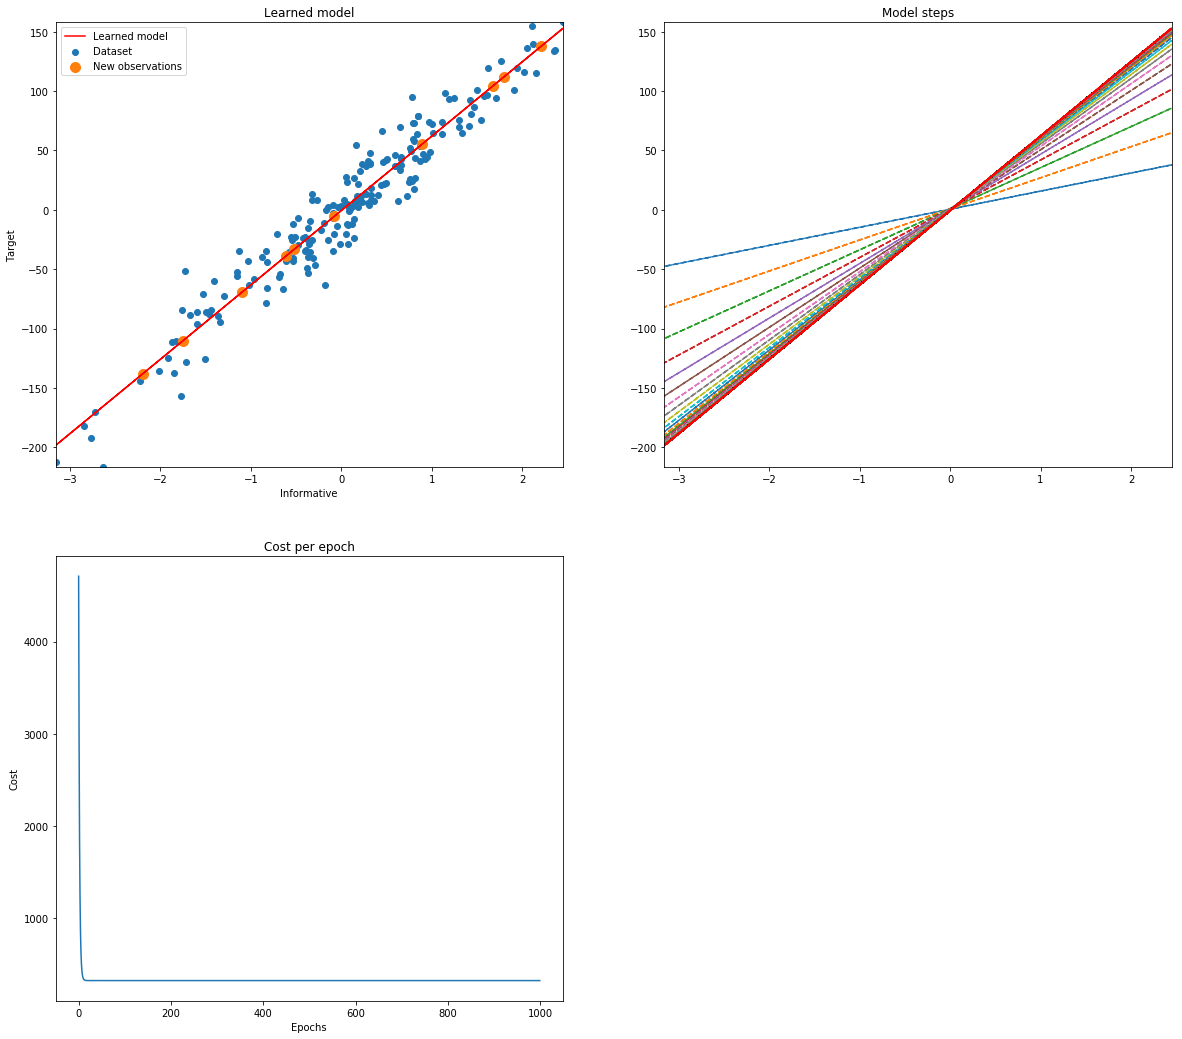

In [131]:

# Visualizing the data
fig = plt.figure(1, figsize=(20,18))
ax  = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

ax.set_title('Learned model')
ax.set_xlabel('Informative')
ax.set_ylabel('Target')
ax.set_xlim(min(X), max(X))
ax.set_ylim(min(y), max(y))

ax1.set_title('Model steps')
ax1.set_xlim(min(X), max(X))
ax1.set_ylim(min(y), max(y))

ax2.set_title('Cost per epoch')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Cost')

ax.scatter(X[:], y[:])

# Model - Stochastic gradient decent to minimize a cost/loss function

predicted = np.ndarray((len(y)))
m         = float(len(y))
y = y.reshape(len(y), 1)

# Model initial variables
weight    = 1   # Weight
bias      = 0    # Bias
epochs    = 1000  # Training epochs
lr        = 0.1  # Higher learning rate results in bigger gradient decent steps
total_cost= []

time_start = time.time() # Start time

# Start training
for e in range(epochs):
    
    predictions = (weight * X) + bias

    cost = sum((1/m) * (y-predictions)**2)
    total_cost.append(cost)
    # Find the gradient w.r.t weight and bias
    w_gradient = -(2/m) * sum(X * (y-predictions))
    b_gradient = -(2/m) * sum(y-predictions)

    # Gradient update
    weight = weight - (lr * w_gradient)
    bias   = bias - (lr * b_gradient)
    
    # Plot the current model
    ax1.plot(X, (X*weight+bias), '--')
    

measured_time = time.time() - time_start # Total measured time

# Print measured values
print(f'Cost:           {np.round(cost.item(), decimals=2)}') # Would probably result in a high cost, because there is no data-scaling 
print(f'Learned weight: {np.round(weight.item(), decimals=2)}')
print(f'Learned bias:   {np.round(bias.item(), decimals=2)}')
print(f'Measured time:  {np.round(measured_time, decimals=3)} seconds')

ax.plot(X, (weight*X)+bias,'r')
ax1.plot(X, (weight*X)+bias, 'r', linewidth=2)

def predict_regression(X):
    prediction =(X*weight) + bias
    return prediction

# New data observations
new_observations = np.random.uniform(low=min(X), high=max(X), size=10).reshape(10,1)

# Predict some new observasions
new_predictions = predict_regression(new_observations)

ax.scatter(new_observations, new_predictions, s=100)
ax2.plot(np.arange(len(total_cost)), total_cost)
ax.legend( ['Learned model', 'Dataset', 'New observations'])

    